In [1]:
import pandas as pd
df = pd.read_csv('global_terrorism.csv', encoding = 'ISO-8859-1')
df

C:\Users\DCW\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [2]:
# check the null values for every column
j = 0
data1 = []
data2 = []
data3 = []
data4 = []
for i in df.columns:
    data1.append(j)
    data2.append(i)
    data3.append(df[i].isnull().sum())
    data4.append((df[i].isnull().sum()/len(df))*100)
    j = j + 1
data = list(zip(data1, data2, data3, data4))
col_stats = pd.DataFrame(data, columns = ['Column Index', 'Column Name', 'Null Values', 'NA %'])
col_stats

,Column Index,Column Name,Null Values,NA %
0,0,eventid,0,0.000000
1,1,iyear,0,0.000000
2,2,imonth,0,0.000000
3,3,iday,0,0.000000
4,4,approxdate,172452,94.914993
...,...,...,...,...
130,130,INT_LOG,0,0.000000
131,131,INT_IDEO,0,0.000000
132,132,INT_MISC,0,0.000000
133,133,INT_ANY,0,0.000000


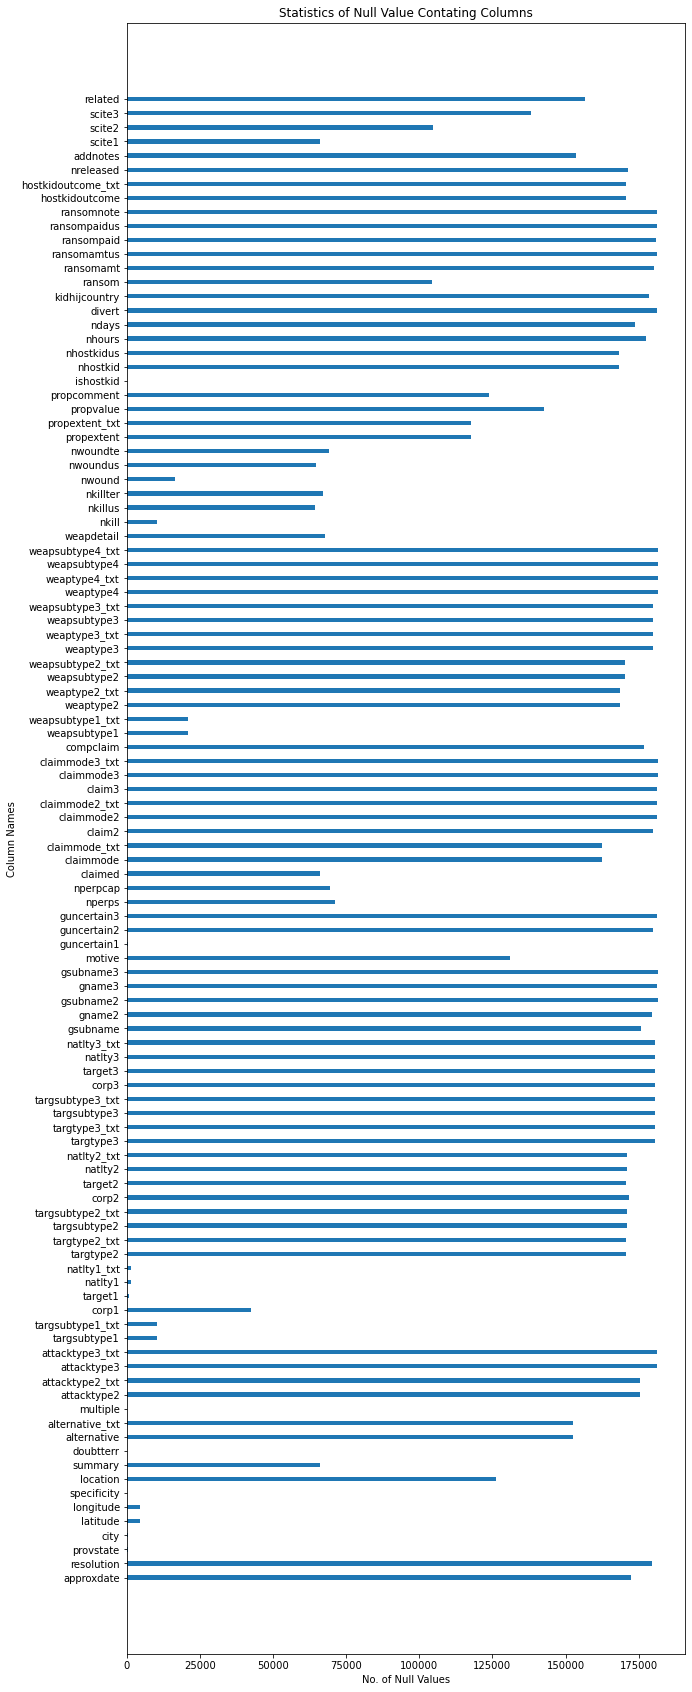

In [3]:
# plot the null value statistics from the columns
import matplotlib.pyplot as plt 
x =  col_stats[col_stats.iloc[:, 2] != 0].iloc[:, 1]
y =  col_stats[col_stats.iloc[:, 2] != 0].iloc[:, 2]
plt.figure(figsize = (10, 30))
plt.barh(x, y, .3)
plt.title('Statistics of Null Value Contating Columns')
plt.ylabel('Column Names')
plt.xlabel('No. of Null Values')
plt.show()

In [4]:
# drop columns which contains null values more than 10%
for i in df.columns:
    if (df[i].isnull().sum()/len(df))*100 >= 10:
        df.drop([i], axis = 1, inplace = True)
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weaptype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,Unknown,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,Unknown,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,Unknown,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Explosives,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,Incendiary,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Firearms,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,Explosives,2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Incendiary,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,Explosives,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [5]:
# label encode attack city names
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['city'] = enc.fit_transform(df['city'])
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weaptype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,Unknown,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,Unknown,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,Unknown,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Explosives,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,Incendiary,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,Firearms,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,Explosives,2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,Incendiary,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,Explosives,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [6]:
# check the datatypes of dataframe columns
df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                  int32
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
individual            int64
weaptype1             int64
weaptype1_txt       

In [7]:
# drop columns which contains string data
for i in df.columns:
    if df[i].dtype == 'object':
        df.drop([i], axis = 1, inplace = True)
df

,eventid,iyear,imonth,iday,extended,country,region,city,latitude,longitude,...,individual,weaptype1,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,2,29806,18.456792,-69.951164,...,0,13,1.0,0.0,0,0.0,0,0,0,0
1,197000000002,1970,0,0,0,130,1,22166,19.371887,-99.086624,...,0,13,0.0,0.0,0,1.0,0,1,1,1
2,197001000001,1970,1,0,0,160,5,34517,15.478598,120.599741,...,0,13,1.0,0.0,0,0.0,-9,-9,1,1
3,197001000002,1970,1,0,0,78,8,2513,37.997490,23.762728,...,0,6,NaN,NaN,1,0.0,-9,-9,1,1
4,197001000003,1970,1,0,0,101,4,11264,33.580412,130.396361,...,0,8,NaN,NaN,1,0.0,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,11,6849,2.359673,45.385034,...,0,5,1.0,2.0,-9,0.0,0,0,0,0
181687,201712310029,2017,12,31,0,200,10,14575,35.407278,35.942679,...,0,6,2.0,7.0,1,0.0,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,5,18159,6.900742,124.437908,...,0,8,0.0,0.0,1,0.0,0,0,0,0
181689,201712310031,2017,12,31,0,92,6,14206,24.798346,93.940430,...,0,6,0.0,0.0,-9,0.0,-9,-9,0,-9


In [8]:
# check null values within the dataset
df.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
region              0
city                0
latitude         4556
longitude        4557
specificity         6
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           1
multiple            1
success             0
suicide             0
attacktype1         0
targtype1           0
targsubtype1    10373
natlty1          1559
guncertain1       380
individual          0
weaptype1           0
nkill           10313
nwound          16311
property            0
ishostkid         178
INT_LOG             0
INT_IDEO            0
INT_MISC            0
INT_ANY             0
dtype: int64

In [9]:
# take only nesseccary columns from the existing dataframe
selected = df[['iyear', 'imonth', 'iday', 'extended', 'region', 'city', 'specificity', 'vicinity', 
               'success', 'attacktype1', 'targtype1', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']]
terror = selected.copy()
terror

,iyear,imonth,iday,extended,region,city,specificity,vicinity,success,attacktype1,targtype1,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,2,29806,1.0,0,1,1,14,0,0,0,0
1,1970,0,0,0,1,22166,1.0,0,1,6,7,0,1,1,1
2,1970,1,0,0,5,34517,4.0,0,1,1,10,-9,-9,1,1
3,1970,1,0,0,8,2513,1.0,0,1,3,7,-9,-9,1,1
4,1970,1,0,0,4,11264,1.0,0,1,7,7,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,11,6849,2.0,0,1,2,4,0,0,0,0
181687,2017,12,31,0,10,14575,1.0,1,1,3,4,-9,-9,1,1
181688,2017,12,31,0,5,18159,2.0,0,1,7,14,0,0,0,0
181689,2017,12,31,0,6,14206,1.0,0,0,3,2,-9,-9,0,-9


In [10]:
# check for null values in the dataset
terror.isnull().sum()

iyear          0
imonth         0
iday           0
extended       0
region         0
city           0
specificity    6
vicinity       0
success        0
attacktype1    0
targtype1      0
INT_LOG        0
INT_IDEO       0
INT_MISC       0
INT_ANY        0
dtype: int64

In [11]:
# fill null values with 0 for specificity columns
terror['specificity'].fillna(0, inplace = True)

In [12]:
# convert datatypes and negative values into positive values
import numpy as np
terror['specificity'] = terror['specificity'].astype(int) 
for i in range(15):
    terror.iloc[:, i] = np.abs(terror.iloc[:, i])
terror

,iyear,imonth,iday,extended,region,city,specificity,vicinity,success,attacktype1,targtype1,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,2,29806,1,0,1,1,14,0,0,0,0
1,1970,0,0,0,1,22166,1,0,1,6,7,0,1,1,1
2,1970,1,0,0,5,34517,4,0,1,1,10,9,9,1,1
3,1970,1,0,0,8,2513,1,0,1,3,7,9,9,1,1
4,1970,1,0,0,4,11264,1,0,1,7,7,9,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,11,6849,2,0,1,2,4,0,0,0,0
181687,2017,12,31,0,10,14575,1,1,1,3,4,9,9,1,1
181688,2017,12,31,0,5,18159,2,0,1,7,14,0,0,0,0
181689,2017,12,31,0,6,14206,1,0,0,3,2,9,9,0,9


In [13]:
x = terror.drop(['city'], axis = 1)
y = terror['city']

In [18]:
# perform train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [19]:
# apply linear regression 
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
lreg.score(x_test, y_test)

0.09095965419009

In [20]:
# apply k nearest neighborhood classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.1735876056027959

In [21]:
# apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

MemoryError: could not allocate 16587423744 bytes